In [678]:
import wget
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error, r2_score

In [644]:
data_link =  'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [645]:
current_directory  = os.getcwd()
files_in_directory = os.listdir(current_directory)
csv_files = [file for file in files_in_directory if file.endswith('.csv')]


In [646]:
if not csv_files:
    data = wget.download(data_link)
    print(data)

In [647]:
df_data = pd.read_csv(data)

In [648]:
df_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [649]:
(df_data[df_data.median_house_value>=500001]).shape

(965, 10)

This is a bit strange. There are 965 houses sold exactly at $500,001! 

(array([4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 9.000e+00,
        3.000e+00, 1.600e+01, 2.200e+01, 4.300e+01, 7.800e+01, 1.250e+02,
        1.960e+02, 2.330e+02, 2.380e+02, 3.490e+02, 3.550e+02, 2.690e+02,
        4.190e+02, 5.710e+02, 6.440e+02, 5.180e+02, 6.760e+02, 6.150e+02,
        6.540e+02, 8.350e+02, 8.620e+02, 1.157e+03, 1.015e+03, 1.030e+03,
        1.009e+03, 8.090e+02, 1.044e+03, 9.290e+02, 7.930e+02, 8.150e+02,
        5.800e+02, 5.180e+02, 6.650e+02, 4.800e+02, 3.460e+02, 2.890e+02,
        2.610e+02, 1.154e+03]),
 array([ 9.61580548,  9.68593672,  9.75606796,  9.82619919,  9.89633043,
         9.96646167, 10.03659291, 10.10672415, 10.17685538, 10.24698662,
        10.31711786, 10.3872491 , 10.45738034, 10.52751157, 10.59764281,
        10.66777405, 10.73790529, 10.80803653, 10.87816776, 10.948299  ,
        11.01843024, 11.08856148, 11.15869271, 11.22882395, 11.29895519,
        11.

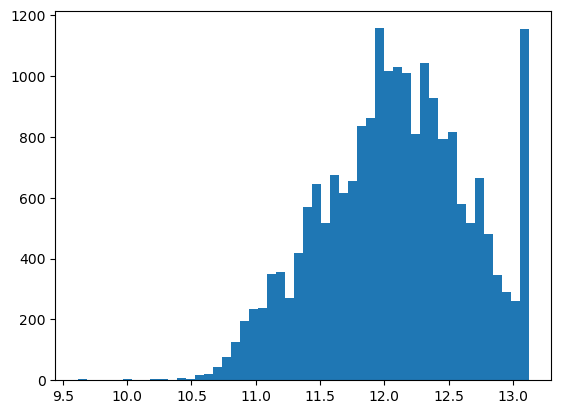

In [650]:
plt.hist(np.log1p(df_data['median_house_value']), bins=50)

In [651]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [652]:
df_data['ocean_proximity'] = df_data['ocean_proximity'].str.lower().str.replace(' ','_')

In [653]:
df_data = df_data[(df_data['ocean_proximity']=='<1h_ocean') | (df_data['ocean_proximity']=='inland')]

In [654]:
retained_columns = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']

In [655]:
df_data[retained_columns].isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [656]:
df_data['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [657]:
df_shuffled = df_data.sample(frac=1, random_state=42)

In [658]:
df_train, df_test_val = train_test_split(df_shuffled,test_size= 0.4, random_state=42)
df_val, df_test = train_test_split(df_test_val,test_size= 0.2, random_state=42)

In [659]:
df_train['median_house_value'] = np.log1p(df_train['median_house_value'])
df_val['median_house_value'] = np.log1p(df_val['median_house_value'])
df_test['median_house_value'] = np.log1p(df_test['median_house_value'])


In [660]:
df_train_mean_filled = df_train.copy()
df_train_mean_filled.fillna(df_train_mean_filled.mean(), inplace=True)

C:\Users\basha\AppData\Local\Temp\ipykernel_3896\746520245.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_mean_filled.fillna(df_train_mean_filled.mean(), inplace=True)


In [661]:
df_train_zero_filled = df_train.copy()
df_train_zero_filled.fillna(0, inplace=True)

In [662]:
df_train_mean_filled['total_bedrooms'].mean()

543.4965102544829

In [663]:
df_train_zero_filled['total_bedrooms'].mean()

537.7797492562686

In [664]:
model_zero_filled = LinearRegression()
model_mean_filled = LinearRegression()

In [665]:
df_train_mean_filled['median_house_value']

16677    12.372015
3158     11.456366
2355     11.923716
12879    11.603689
9526     11.458480
           ...    
6290     11.994740
20508    11.238502
6681     12.230770
13070    11.630717
3316     11.444657
Name: median_house_value, Length: 9412, dtype: float64

In [666]:
dv_mean_filled = DictVectorizer()
dv_zero_filled = DictVectorizer()

In [667]:
y_train_mean_filled = df_train_mean_filled['median_house_value']
df_train_mean_filled.drop(['median_house_value'], axis = 1, inplace=True)
X_train_mean_filled = dv_mean_filled.fit_transform(df_train_mean_filled.to_dict(orient='records'))

In [668]:
y_train_zero_filled = df_train_zero_filled['median_house_value']
df_train_zero_filled.drop(['median_house_value'], axis = 1, inplace=True)
X_train_zero_filled = dv_zero_filled.fit_transform(df_train_zero_filled.to_dict(orient='records'))

In [669]:
model_mean_filled.fit(X_train_mean_filled,y_train_mean_filled)
model_zero_filled.fit(X_train_zero_filled, y_train_zero_filled)

LinearRegression()

In [670]:
df_val_mean_filled = df_val.fillna(df_train_mean_filled.mean())
df_val_zero_filled = df_val.fillna(0)

C:\Users\basha\AppData\Local\Temp\ipykernel_3896\2913816741.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_val_mean_filled = df_val.fillna(df_train_mean_filled.mean())


In [671]:
df_val_mean_filled.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [672]:
df_val_zero_filled.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [673]:
y_val = df_val_mean_filled['median_house_value']
# y_test = df_test['median_house_value']

In [674]:
df_val_mean_filled.drop(['median_house_value'], axis = 1, inplace=True)
df_val_zero_filled.drop(['median_house_value'], axis = 1, inplace=True)

# df_test.drop(['median_house_value'], axis = 1, inplace=True)
X_val_mean_filled = dv_mean_filled.transform(df_val_mean_filled.to_dict(orient='records'))
X_val_zero_filled = dv_zero_filled.transform(df_val_zero_filled.to_dict(orient='records'))

In [675]:
y_pred_mean_filled = model_mean_filled.predict(X_val_mean_filled)

In [676]:
np.sqrt(mean_squared_error(y_val, y_pred_mean_filled))

0.32941336562012374

In [677]:
y_pred_zero_filled = model_zero_filled.predict(X_val_zero_filled)
np.sqrt(mean_squared_error(y_val, y_pred_zero_filled))

0.3295361904604048

In [679]:
alphas = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for alpha in alphas:
    lasso_model_zero_filled = Lasso(alpha = alpha)
    lasso_model_zero_filled.fit(X_train_zero_filled,y_train_zero_filled)
    y_lasso_pred = lasso_model_zero_filled.predict(X_val_zero_filled)
    rsme = np.round(np.sqrt(mean_squared_error(y_val, y_lasso_pred)),2)
    print(f"The error for alpha = {alpha} is {rsme}")

C:\Users\basha\AppData\Local\Temp\ipykernel_3896\1225601938.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model_zero_filled.fit(X_train_zero_filled,y_train_zero_filled)
c:\Users\basha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.289043880692, tolerance: 0.2988261525357437
  model = cd_fast.sparse_enet_coordinate_descent(


The error for alpha = 0 is 0.33
The error for alpha = 1e-06 is 0.33
The error for alpha = 0.0001 is 0.33
The error for alpha = 0.001 is 0.33
The error for alpha = 0.01 is 0.33
The error for alpha = 0.1 is 0.39
The error for alpha = 1 is 0.55
The error for alpha = 5 is 0.55
The error for alpha = 10 is 0.56


In [686]:
random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []
for random_state in random_states:
    df_train, df_test_val = train_test_split(df_shuffled,test_size= 0.4, random_state=random_state)
    df_val, df_test = train_test_split(df_test_val,test_size= 0.2, random_state=random_state)
    df_train['median_house_value'] = np.log1p(df_train['median_house_value'])
    df_val['median_house_value'] = np.log1p(df_val['median_house_value'])
    df_test['median_house_value'] = np.log1p(df_test['median_house_value'])
    df_train_zero_filled = df_train.copy()
    df_train_zero_filled.fillna(0, inplace=True)
    model_zero_filled = Lasso()
    dv_zero_filled = DictVectorizer()
    y_train_zero_filled = df_train_zero_filled['median_house_value']
    df_train_zero_filled.drop(['median_house_value'], axis = 1, inplace=True)
    X_train_zero_filled = dv_zero_filled.fit_transform(df_train_zero_filled.to_dict(orient='records'))
    model_zero_filled.fit(X_train_zero_filled, y_train_zero_filled)
    df_val_zero_filled = df_val.fillna(0)
    df_val_zero_filled.drop(['median_house_value'], axis = 1, inplace=True)

    X_val_zero_filled = dv_zero_filled.transform(df_val_zero_filled.to_dict(orient='records'))
    y_pred_zero_filled = model_zero_filled.predict(X_val_zero_filled)
    rmse_scores.append(np.round(np.sqrt(mean_squared_error(y_val, y_pred_zero_filled)),3))

In [689]:
random_states = [9]
rmse_scores = []
for random_state in random_states:
    df_train, df_test = train_test_split(df_shuffled,test_size= 0.2, random_state=random_state)
    df_train['median_house_value'] = np.log1p(df_train['median_house_value'])
    df_test['median_house_value'] = np.log1p(df_test['median_house_value'])
    df_train_zero_filled = df_train.copy()
    df_train_zero_filled.fillna(0, inplace=True)
    model_zero_filled = Lasso(alpha = 0.001)
    dv_zero_filled = DictVectorizer()
    y_train_zero_filled = df_train_zero_filled['median_house_value']
    df_train_zero_filled.drop(['median_house_value'], axis = 1, inplace=True)
    X_train_zero_filled = dv_zero_filled.fit_transform(df_train_zero_filled.to_dict(orient='records'))
    model_zero_filled.fit(X_train_zero_filled, y_train_zero_filled)
    df_test_zero_filled = df_test.fillna(0)
    y_test = df_test_zero_filled['median_house_value']
    df_test_zero_filled.drop(['median_house_value'], axis = 1, inplace=True)

    X_test_zero_filled = dv_zero_filled.transform(df_test_zero_filled.to_dict(orient='records'))
    y_pred_zero_filled = model_zero_filled.predict(X_test_zero_filled)
    rmse_scores.append(np.round(np.sqrt(mean_squared_error(y_test, y_pred_zero_filled)),3))

In [690]:
rmse_scores

[0.317]